In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from combat.pycombat import pycombat
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import fdrcorrection
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
import itertools
from diptest import diptest
import seaborn as sns
import joblib
from joblib import parallel_backend
from sklearn.model_selection import GroupShuffleSplit
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from scipy.stats import wilcoxon
import warnings

In [2]:
os.getcwd()

'c:\\Users\\samue\\OneDrive\\Documenti\\Studio\\Università\\Tesi\\Progetto\\Ricerca\\Script\\DatasetReduced'

In [3]:
os.chdir("../../SYMBOL/Dataset")

Applico Combat

In [4]:
dataset = pd.read_csv('MergedDatasetReduced_symbol.csv')
datasetID = dataset['SampleID'].apply(lambda x: x.split('-')[0]).values
sampleID = dataset['SampleID']
label = dataset['Label']
dataset = dataset.drop(columns=['SampleID', 'Label'])

# # ## Batch removal
dataset = pycombat(dataset.transpose(), datasetID).transpose()

dataset.insert(0, 'SampleID', sampleID)
dataset.insert(1, 'Label', label)

dataset

Found 7 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


SampleID  Label       XPO6    ARPC1A  \
0               0-GSM1026056_600009.0001      1  10.525171  7.022214   
1    0-GSM1026057_600009.0001-FollowUp_1      1  10.881165  6.973561   
2                0-GSM1026058_41461.0001      1  11.430331  7.140780   
3                0-GSM1026059_41462.0001      1  11.385201  7.144255   
4               0-GSM1026060_600029.0001      1  11.344344  7.067116   
..                                   ...    ...        ...       ...   
724                      6-GSM545842_M10      1  10.931859  7.106400   
725                      6-GSM545843_M11      1  10.765313  7.079116   
726           6-GSM545844_M11-FollowUp_1      1  10.977433  7.030231   
727                      6-GSM545845_M12      1  10.589295  7.081161   
728           6-GSM545846_M12-FollowUp_1      1  11.134102  7.035903   

        THOP1    ATP2B2      CSTA       PKM  MAPK1IP1L     ABCG2  ...  \
0    6.483224  5.848133  7.591375  8.987009   9.548412  5.041454  ...   
1    6.813249  5.887911  7.668762  9.267965   9.533519  4.883477  ...   
2    6.688973  5.984697  7.571597  9.025906   9.516713  4.793884  ...   
3    6.482745  5.616827  7.819636  9.037302   9.581727  5.051594  ...   
4    6.384345  5.762024  7.962971  9.252510   9.611660  4.949163  ...   
..        ...       ...       ...       ...        ...       ...  ...   
724  6.789337  6.003297  7.964093  9.272532   9.508226  4.904147  ...   
725  6.572470  5.744757  7.963980  9.123222   9.528200  4.770082  ...   
726  6.554086  5.716029  7.972142  9.102181   9.592449  4.973374  ...   
727  6.484474  5.744757  7.956867  9.140242   9.534618  5.150804  ...   
728  6.556645  5.601516  7.959362  9.151900   9.597398  5.216203  ...   

        GPR25    LRRC31     GPR88   LAMTOR3    ACTL6A    MS4A6A     BAZ2A  \
0    6.119568  3.828953  5.485397  8.391649  6.906047  9.119511  7.989939   
1    6.158344  3.782587  5.483554  8.398246  6.886462  9.133109  8.325695   
2    6.166022  3.867980  5.531954  8.335890  6.885936  9.222653  8.301554   
3    6.092625  3.812816  5.393568  8.600387  6.919007  9.323385  8.333977   
4    6.107478  3.762202  5.412828  8.516187  6.921658  9.388868  8.496262   
..        ...       ...       ...       ...       ...       ...       ...   
724  6.134278  3.802080  5.432256  8.533130  6.862112  9.286014  8.442553   
725  6.090562  3.982923  5.388578  8.549721  6.990629  9.269902  8.108137   
726  6.046938  3.812349  5.397380  8.556445  6.971580  9.253054  8.279138   
727  6.107268  3.955092  5.404604  8.576988  6.969681  9.256837  8.083611   
728  6.087615  3.727008  5.395029  8.570407  6.973779  9.266940  8.331888   

         TPM1    DIABLO     DOC2A  
0    7.300196  7.917960  5.448753  
1    7.226071  7.920274  5.776065  
2    7.299852  7.866331  5.740622  
3    7.363228  7.953213  5.165763  
4    7.254713  7.891466  5.287396  
..        ...       ...       ...  
724  7.370798  7.970275  5.338771  
725  7.307330  7.984256  5.452894  
726  7.338065  7.993246  5.532808  
727  7.385615  7.974383  5.427824  
728  7.382921  7.974383  5.456992  

[729 rows x 11494 columns]

In [37]:
dataset.to_csv('MergedDatasetReducedCombat_symbol.csv', index=False)

Numero di MS: 434
Numero di Control: 295


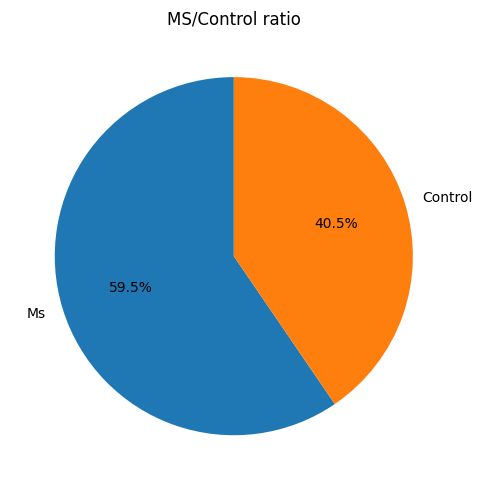

In [5]:
Ms = dataset[dataset['Label'] == 1].shape[0]
Control = dataset[dataset['Label'] == 0].shape[0]

print("Numero di MS:", Ms)
print("Numero di Control:", Control)

plt.figure(figsize=(5, 5))

plt.pie([Ms, Control], labels=['Ms', 'Control'], autopct='%1.1f%%', startangle=90)
plt.title('MS/Control ratio')

plt.tight_layout()
plt.show()

<h2>Inferenza genere</h2>

Genere noto

In [6]:
dataset['mergeID'] = dataset['SampleID'].apply(lambda x: x.split('_')[0].split('-')[1])

def genderMapping(fileMapPath):
    mapping = pd.read_csv(f"{fileMapPath}", sep="\t", header=None)
    mapping.drop([0], axis=1, inplace=True)
    mapping = mapping.T
    mapping.columns = ["GSM", "Gender"]
    mapping['Gender'] = mapping['Gender'].apply(lambda x: x.split(" ")[1])
    return mapping

gse41848Mapping = genderMapping("../../../Dataset/DatasetInfo/GSE41848.txt")
gse41849Mapping = genderMapping("../../../Dataset/DatasetInfo/GSE41849.txt")
gse146383Mapping = genderMapping("../../../Dataset/DatasetInfo/GSE146383.txt")
gse41890Mapping = genderMapping("../../../Dataset/DatasetInfo/GSE41890.txt")

mapping = pd.concat([gse41848Mapping, gse41849Mapping, gse146383Mapping], axis=0)

dataset = pd.merge(dataset, mapping, left_on='mergeID', right_on='GSM', how='left')
dataset.drop(['mergeID', 'GSM'], axis=1, inplace=True)

datasetGenderExact = dataset[dataset['Gender'].isna() == False]

In [7]:
os.getcwd()

'c:\\Users\\samue\\OneDrive\\Documenti\\Studio\\Università\\Tesi\\Progetto\\Ricerca\\SYMBOL\\Dataset'

Inferenza di genere con Kmeans e plot PCA

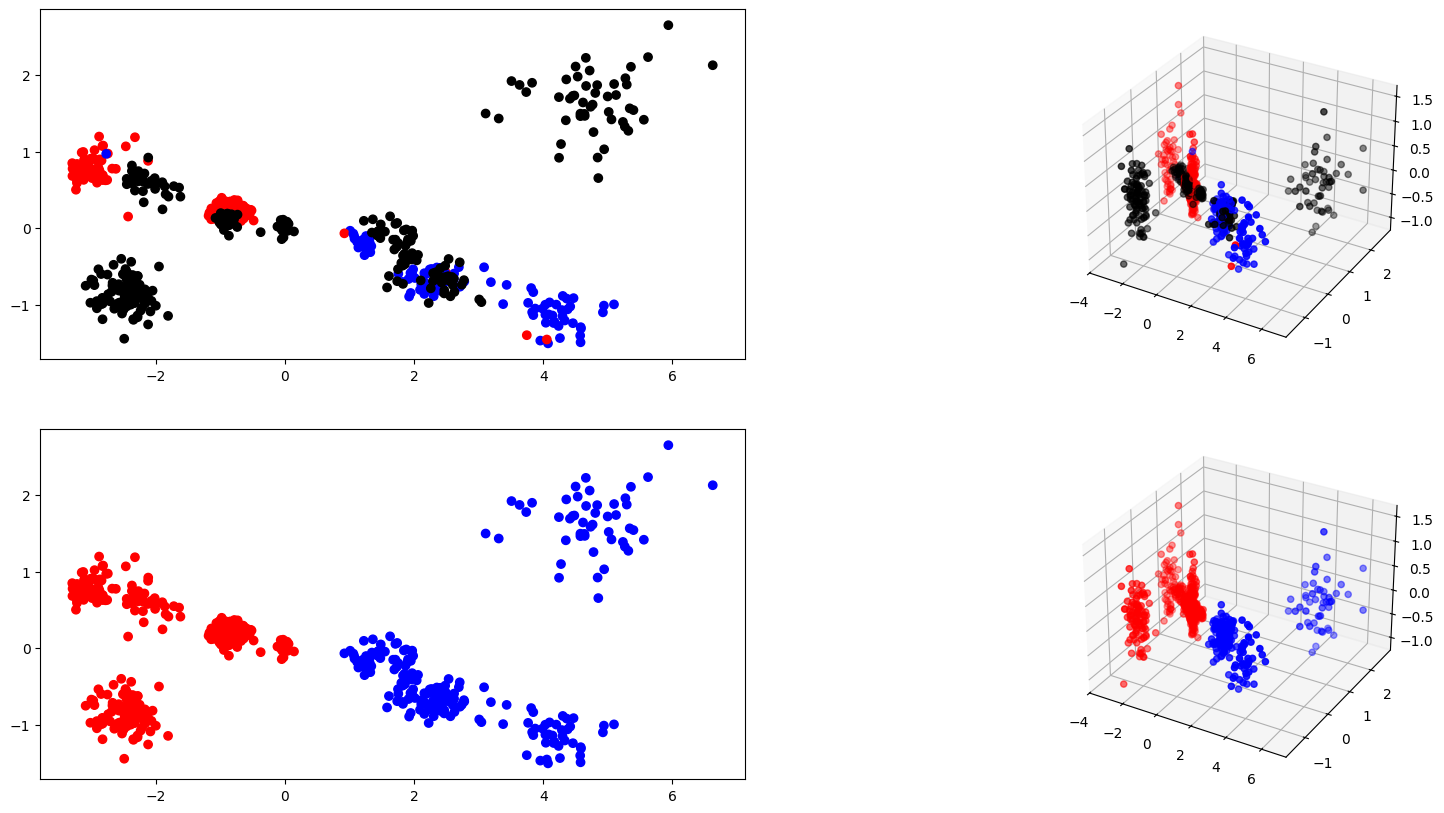

In [8]:
y_linked_genes = pd.read_csv("../../../Dataset/Y_linked_genes.txt", sep=',')

current = dataset.copy()
common_y_genes = list(y_linked_genes[y_linked_genes['HGNC symbol'].isin(current.columns)]['HGNC symbol'])

colors = []

for gender in current['Gender']:
    if gender == 'Male' or gender=='male':
        colors.append('blue')
    elif gender == 'Female' or gender == 'female':
        colors.append('red')
    else:
        colors.append('black')

pca = PCA(n_components=2).fit_transform(current[common_y_genes])
pca3 = PCA(n_components=3).fit_transform(current[common_y_genes])

fig = plt.figure(figsize=(20, 10))

plot1 = fig.add_subplot(221)
plot2 = fig.add_subplot(222, projection='3d')
plot3 = fig.add_subplot(223)
plot4 = fig.add_subplot(224, projection='3d')

plot1.scatter(pca[:, 0], pca[:, 1], c=colors)
plot2.scatter(pca3[:, 0], pca3[:, 1], pca3[:, 2], c=colors)

kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
labels = kmeans.fit_predict(current[common_y_genes])

# Assegna il genere in base all'espressione media dei geni Y
male_cluster = np.argmax([current[common_y_genes][labels == i].mean().mean() for i in range(2)])
current['Gender'] = ['Male' if l == male_cluster else 'Female' for l in labels]

colors = []

for gender in current['Gender']:
    if gender == 'Male':
        colors.append('blue')
    elif gender == 'Female':
        colors.append('red')
    else:
        colors.append('black')

pca = PCA(n_components=2).fit_transform(current[common_y_genes])
pca3 = PCA(n_components=3).fit_transform(current[common_y_genes])

plot3.scatter(pca[:, 0], pca[:, 1], c=colors)
plot4.scatter(pca3[:, 0], pca3[:, 1], pca3[:, 2], c=colors)

Numero totale di maschi: 246
Numero totale di femmine: 483
Numero di maschi Ms: 136
Numero di femmine Ms: 298
Numero di maschi Control: 110
Numero di femmine Control: 185


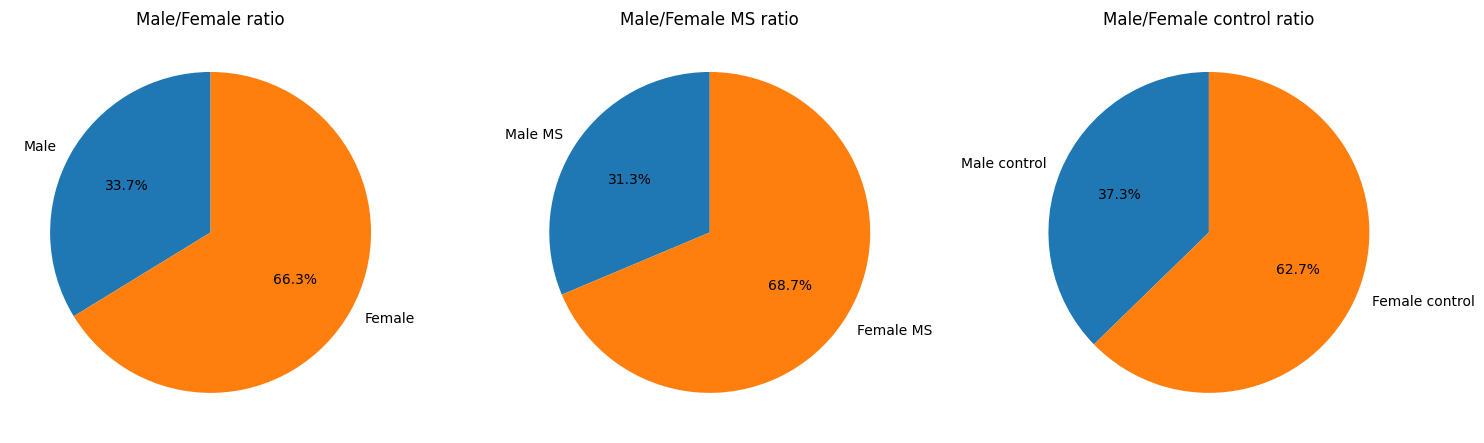

In [10]:
dataset['Gender'] = joblib.load('../Results/DatasetReduced/genderReduced.pkl')
dataset['Gender'] = dataset['Gender'].apply(lambda x: 0 if x == 'female' or x == 'Female' else 1)
sexmap = dataset[['SampleID', 'Gender']].copy()
total_males = sexmap[sexmap['Gender'] == 1].shape[0]
total_females = sexmap[sexmap['Gender'] == 0].shape[0]

sick_df = sexmap[~sexmap['SampleID'].str.contains('Control')]

sick_males = sick_df[sick_df['Gender'] == 1].shape[0]
sick_females = sick_df[sick_df['Gender'] == 0].shape[0]

print("Numero totale di maschi:", total_males)
print("Numero totale di femmine:", total_females)
print("Numero di maschi Ms:", sick_males)
print("Numero di femmine Ms:", sick_females)
print("Numero di maschi Control:", total_males-sick_males)
print("Numero di femmine Control:", total_females-sick_females)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Primo grafico a torta
axs[0].pie([total_males, total_females], labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
axs[0].set_title('Male/Female ratio')

# Secondo grafico a torta
axs[1].pie([sick_males, sick_females], labels=['Male MS', 'Female MS'], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Male/Female MS ratio')

# Terzo grafico a torta
axs[2].pie([total_males-sick_males, total_females-sick_females], labels=['Male control', 'Female control'], autopct='%1.1f%%', startangle=90)
axs[2].set_title('Male/Female control ratio')

# Aggiustiamo il layout per evitare sovrapposizioni
plt.tight_layout()

# Mostriamo i grafici
plt.show()

<h2>Explorative data analysis</h2>

In [11]:
color = ['red', 'navy', 'grey', 'yellow', 'purple', 'pink', 'brown']
classiDataset = ['GSE41848', 'GSE41849', 'GSE146383', 'GSE13732', 'GSE17048', 'GSE41890', 'GSE21942']
classiLabel = ['Control', 'MS']
colorLabel = ['Black', 'Orange']
classiGender = ['Female', 'Male']
colorGender = ['Red', 'Blue']

<h3>Pre Combat</h3>

In [12]:
datasetPreCombat = pd.read_csv('MergedDatasetReduced_symbol.csv')
datasetPreCombat['Gender'] = joblib.load('../Results/DatasetReduced/genderReduced.pkl')
datasetPreCombat

SampleID  Label       XPO6    ARPC1A  \
0               0-GSM1026056_600009.0001      1  11.650549  5.956854   
1    0-GSM1026057_600009.0001-FollowUp_1      1  11.868237  5.697745   
2                0-GSM1026058_41461.0001      1  12.204048  6.588301   
3                0-GSM1026059_41462.0001      1  12.176452  6.606812   
4               0-GSM1026060_600029.0001      1  12.151468  6.195992   
..                                   ...    ...        ...       ...   
724                      6-GSM545842_M10      1   9.325217  8.476524   
725                      6-GSM545843_M11      1   9.240105  8.279137   
726           6-GSM545844_M11-FollowUp_1      1   9.348508  7.925483   
727                      6-GSM545845_M12      1   9.150152  8.293933   
728           6-GSM545846_M12-FollowUp_1      1   9.428572  7.966520   

        THOP1    ATP2B2       CSTA        PKM  MAPK1IP1L     ABCG2  ...  \
0    7.162408  6.453192   6.417070   9.921520   9.345639  5.526452  ...   
1    7.424835  6.495434   6.685321  10.243414   9.292087  5.236324  ...   
2    7.326014  6.598216   6.348511   9.966085   9.231655  5.071786  ...   
3    7.162027  6.207555   7.208305   9.979140   9.465428  5.545075  ...   
4    7.083782  6.361748   7.705152  10.225707   9.573062  5.356958  ...   
..        ...       ...        ...        ...        ...       ...  ...   
724  6.215869  5.096182  11.247372  10.479694  10.073199  3.730077  ...   
725  5.773038  4.877793  11.246373   9.645089  10.210183  3.555146  ...   
726  5.735498  4.853527  11.318210   9.527473  10.650822  3.820406  ...   
727  5.593354  4.877793  11.183782   9.740226  10.254200  4.051920  ...   
728  5.740724  4.756797  11.205737   9.805391  10.684765  4.137255  ...   

       LRRC31     GPR88   LAMTOR3    ACTL6A     MS4A6A     BAZ2A      TPM1  \
0    3.591659  6.990793  8.102131  6.348476   8.500851  8.825179  7.069051   
1    3.375409  6.983589  8.120959  6.256685   8.546182  9.181231  6.840454   
2    3.773682  7.172718  7.942987  6.254222   8.844696  9.155631  7.067990   
3    3.516395  6.631965  8.697892  6.409212   9.180507  9.190014  7.263440   
4    3.280334  6.707222  8.457575  6.421640   9.398804  9.362108  6.928783   
..        ...       ...       ...       ...        ...       ...       ...   
724  2.912370  2.874592  9.129791  7.374601  10.937702  7.659700  8.224351   
725  3.044542  2.536759  9.228510  8.381170  10.820722  7.137152  7.823008   
726  2.919875  2.604844  9.268521  8.231973  10.698401  7.404353  8.017363   
727  3.024201  2.660720  9.390753  8.217098  10.725866  7.098828  8.318048   
728  2.857502  2.586661  9.351598  8.249196  10.799216  7.486778  8.301014   

       DIABLO     DOC2A  Gender  
0    7.250345  6.006205  Female  
1    7.261851  6.411964  Female  
2    6.993573  6.368026  Female  
3    7.425670  5.655392  Female  
4    7.118576  5.806177  Female  
..        ...       ...     ...  
724  8.772679  4.732198  Female  
725  8.878464  5.040987  Female  
726  8.946480  5.257213  Female  
727  8.803759  4.973154  Female  
728  8.803759  5.052076  Female  

[729 rows x 11495 columns]

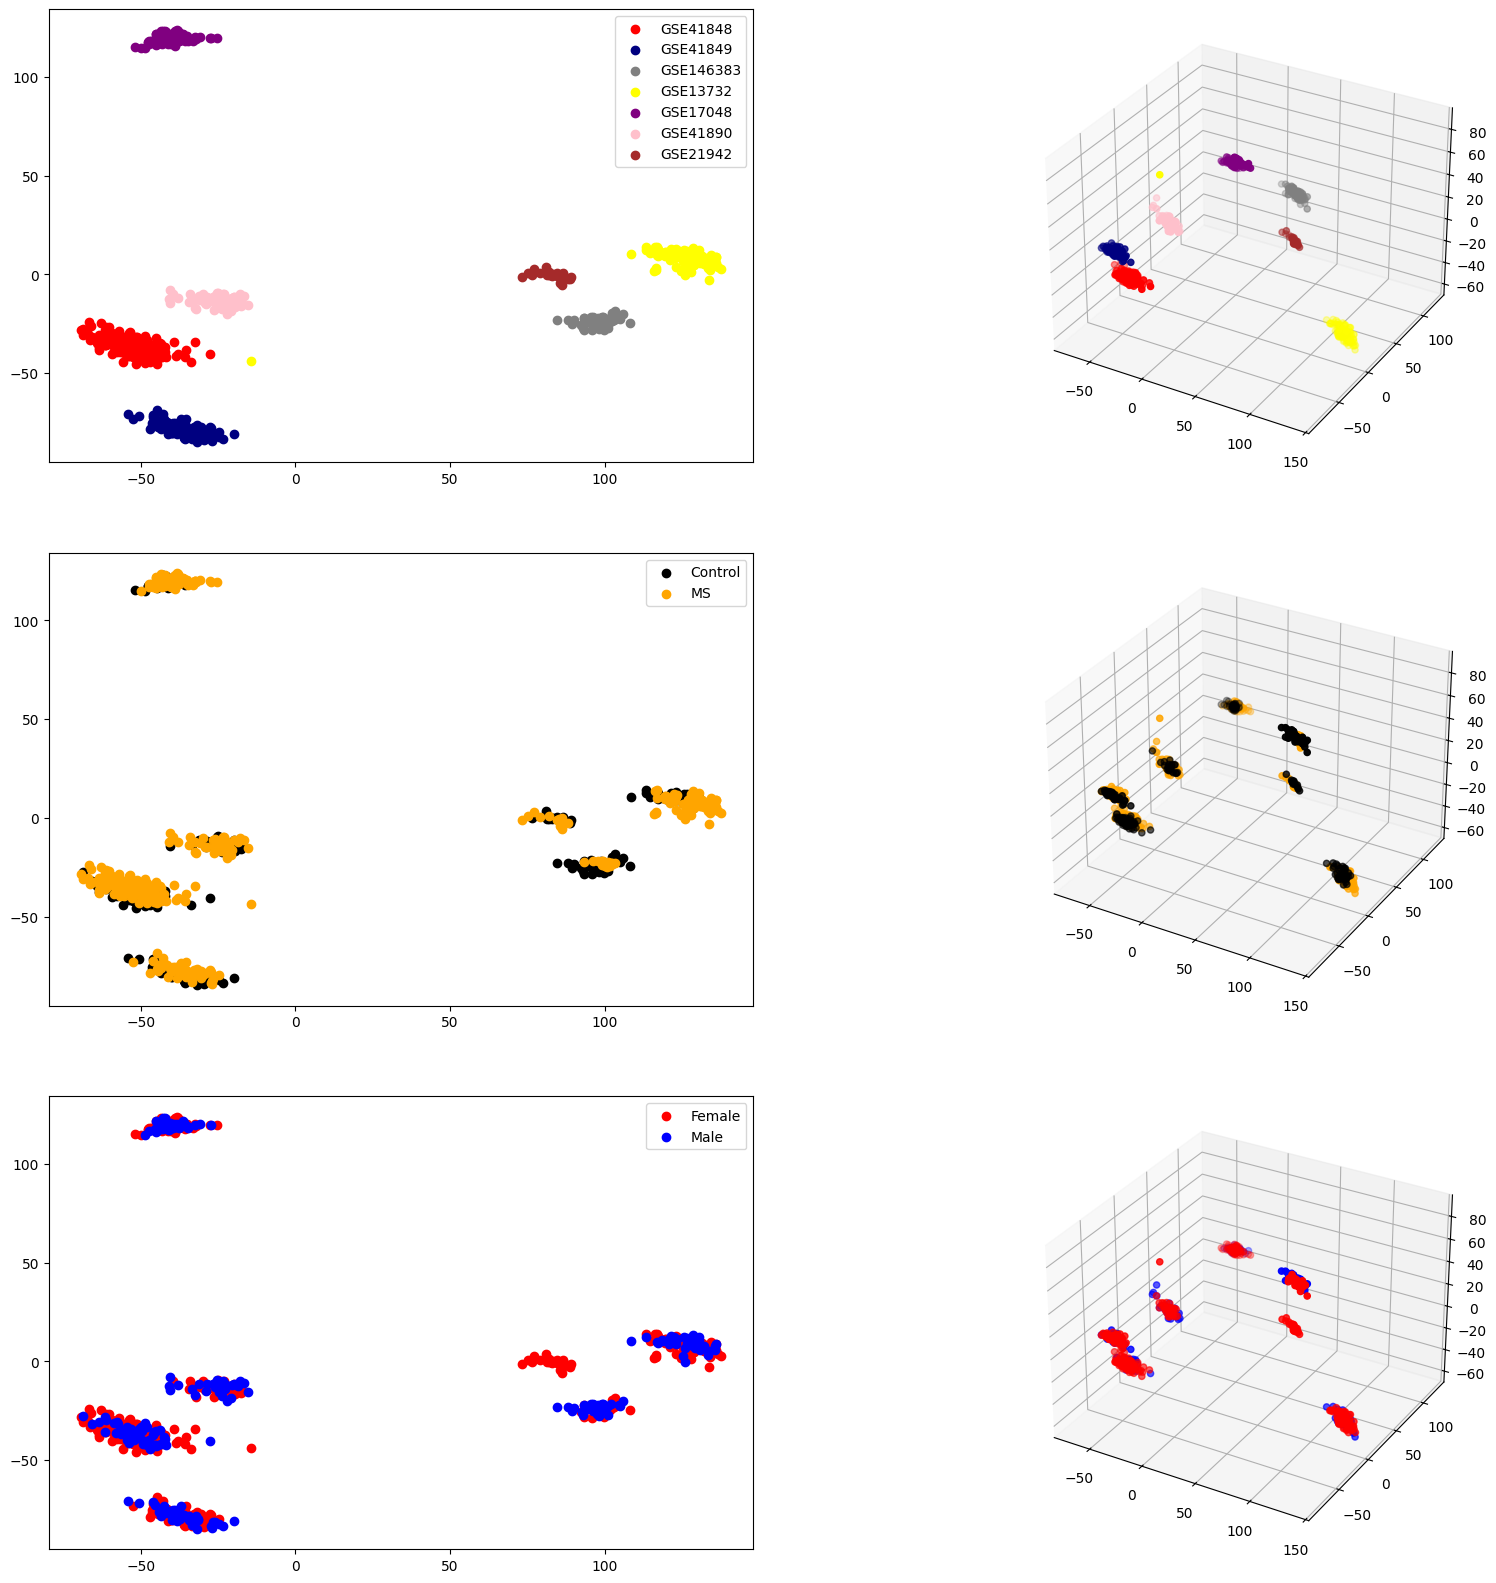

In [13]:
current = datasetPreCombat.copy()
current['Gender'] = current['Gender'].apply(lambda x: 0 if x == 'female' or x == 'Female' else 1)
currentGender = current['Gender']
current.drop(columns=['SampleID', 'Label'], inplace=True)

pca = PCA(n_components=2).fit_transform(current)
pca3 = PCA(n_components=3).fit_transform(current)

fig = plt.figure(figsize=(20, 20))

plot1 = fig.add_subplot(321)
plot2 = fig.add_subplot(322, projection='3d')
plot3 = fig.add_subplot(323)
plot4 = fig.add_subplot(324, projection='3d')
plot5 = fig.add_subplot(325)
plot6 = fig.add_subplot(326, projection='3d')

for i in range(7):
    plot1.scatter(pca[datasetID == str(i)][:, 0], pca[datasetID == str(i)][:, 1], c=color[i], label=classiDataset[i])
    plot2.scatter(pca3[datasetID == str(i)][:, 0], pca3[datasetID == str(i)][:, 1], pca3[datasetID == str(i)][:, 2], c=color[i], label=classiDataset[i])

for i in range(0, 2):
    plot3.scatter(pca[label == i][:, 0], pca[label == i][:, 1], c=colorLabel[i], label=classiLabel[i])
    plot4.scatter(pca3[label == i][:, 0], pca3[label == i][:, 1], pca3[label == i][:, 2], c=colorLabel[i], label=classiLabel[i])

for i in range(0, 2):
    plot5.scatter(pca[currentGender == i][:, 0], pca[currentGender == i][:, 1], c=colorGender[i], label=classiGender[i])
    plot6.scatter(pca3[currentGender == i][:, 0], pca3[currentGender == i][:, 1], pca3[currentGender == i][:, 2], c=colorGender[i], label=classiGender[i])

plot1.legend()
plot3.legend()
plot5.legend()
plt.show()

<h3>Post Combat</h3>

In [14]:
dataset = pd.read_csv('MergedDatasetReducedCombat_symbol.csv')
dataset['Gender'] = joblib.load('../Results/DatasetReduced/genderReduced.pkl')
dataset['Gender'] = dataset['Gender'].apply(lambda x: 0 if x == 'female' or x == 'Female' else 1)
dataset

SampleID  Label       XPO6    ARPC1A  \
0               0-GSM1026056_600009.0001      1  10.525171  7.022214   
1    0-GSM1026057_600009.0001-FollowUp_1      1  10.881165  6.973561   
2                0-GSM1026058_41461.0001      1  11.430331  7.140780   
3                0-GSM1026059_41462.0001      1  11.385201  7.144255   
4               0-GSM1026060_600029.0001      1  11.344344  7.067116   
..                                   ...    ...        ...       ...   
724                      6-GSM545842_M10      1  10.931859  7.106400   
725                      6-GSM545843_M11      1  10.765313  7.079116   
726           6-GSM545844_M11-FollowUp_1      1  10.977433  7.030231   
727                      6-GSM545845_M12      1  10.589295  7.081161   
728           6-GSM545846_M12-FollowUp_1      1  11.134102  7.035903   

        THOP1    ATP2B2      CSTA       PKM  MAPK1IP1L     ABCG2  ...  \
0    6.483224  5.848133  7.591375  8.987009   9.548412  5.041454  ...   
1    6.813249  5.887911  7.668762  9.267965   9.533519  4.883477  ...   
2    6.688973  5.984697  7.571597  9.025906   9.516713  4.793884  ...   
3    6.482745  5.616827  7.819636  9.037302   9.581727  5.051594  ...   
4    6.384345  5.762024  7.962971  9.252510   9.611660  4.949163  ...   
..        ...       ...       ...       ...        ...       ...  ...   
724  6.789337  6.003297  7.964093  9.272532   9.508226  4.904147  ...   
725  6.572470  5.744757  7.963980  9.123222   9.528200  4.770082  ...   
726  6.554086  5.716029  7.972142  9.102181   9.592449  4.973374  ...   
727  6.484474  5.744757  7.956867  9.140242   9.534618  5.150804  ...   
728  6.556645  5.601516  7.959362  9.151900   9.597398  5.216203  ...   

       LRRC31     GPR88   LAMTOR3    ACTL6A    MS4A6A     BAZ2A      TPM1  \
0    3.828953  5.485397  8.391649  6.906047  9.119511  7.989939  7.300196   
1    3.782587  5.483554  8.398246  6.886462  9.133109  8.325695  7.226071   
2    3.867980  5.531954  8.335890  6.885936  9.222653  8.301554  7.299852   
3    3.812816  5.393568  8.600387  6.919007  9.323385  8.333977  7.363228   
4    3.762202  5.412828  8.516187  6.921658  9.388868  8.496262  7.254713   
..        ...       ...       ...       ...       ...       ...       ...   
724  3.802080  5.432256  8.533130  6.862112  9.286014  8.442553  7.370798   
725  3.982923  5.388578  8.549721  6.990629  9.269902  8.108137  7.307330   
726  3.812349  5.397380  8.556445  6.971580  9.253054  8.279138  7.338065   
727  3.955092  5.404604  8.576988  6.969681  9.256837  8.083611  7.385615   
728  3.727008  5.395029  8.570407  6.973779  9.266940  8.331888  7.382921   

       DIABLO     DOC2A  Gender  
0    7.917960  5.448753       0  
1    7.920274  5.776065       0  
2    7.866331  5.740622       0  
3    7.953213  5.165763       0  
4    7.891466  5.287396       0  
..        ...       ...     ...  
724  7.970275  5.338771       0  
725  7.984256  5.452894       0  
726  7.993246  5.532808       0  
727  7.974383  5.427824       0  
728  7.974383  5.456992       0  

[729 rows x 11495 columns]

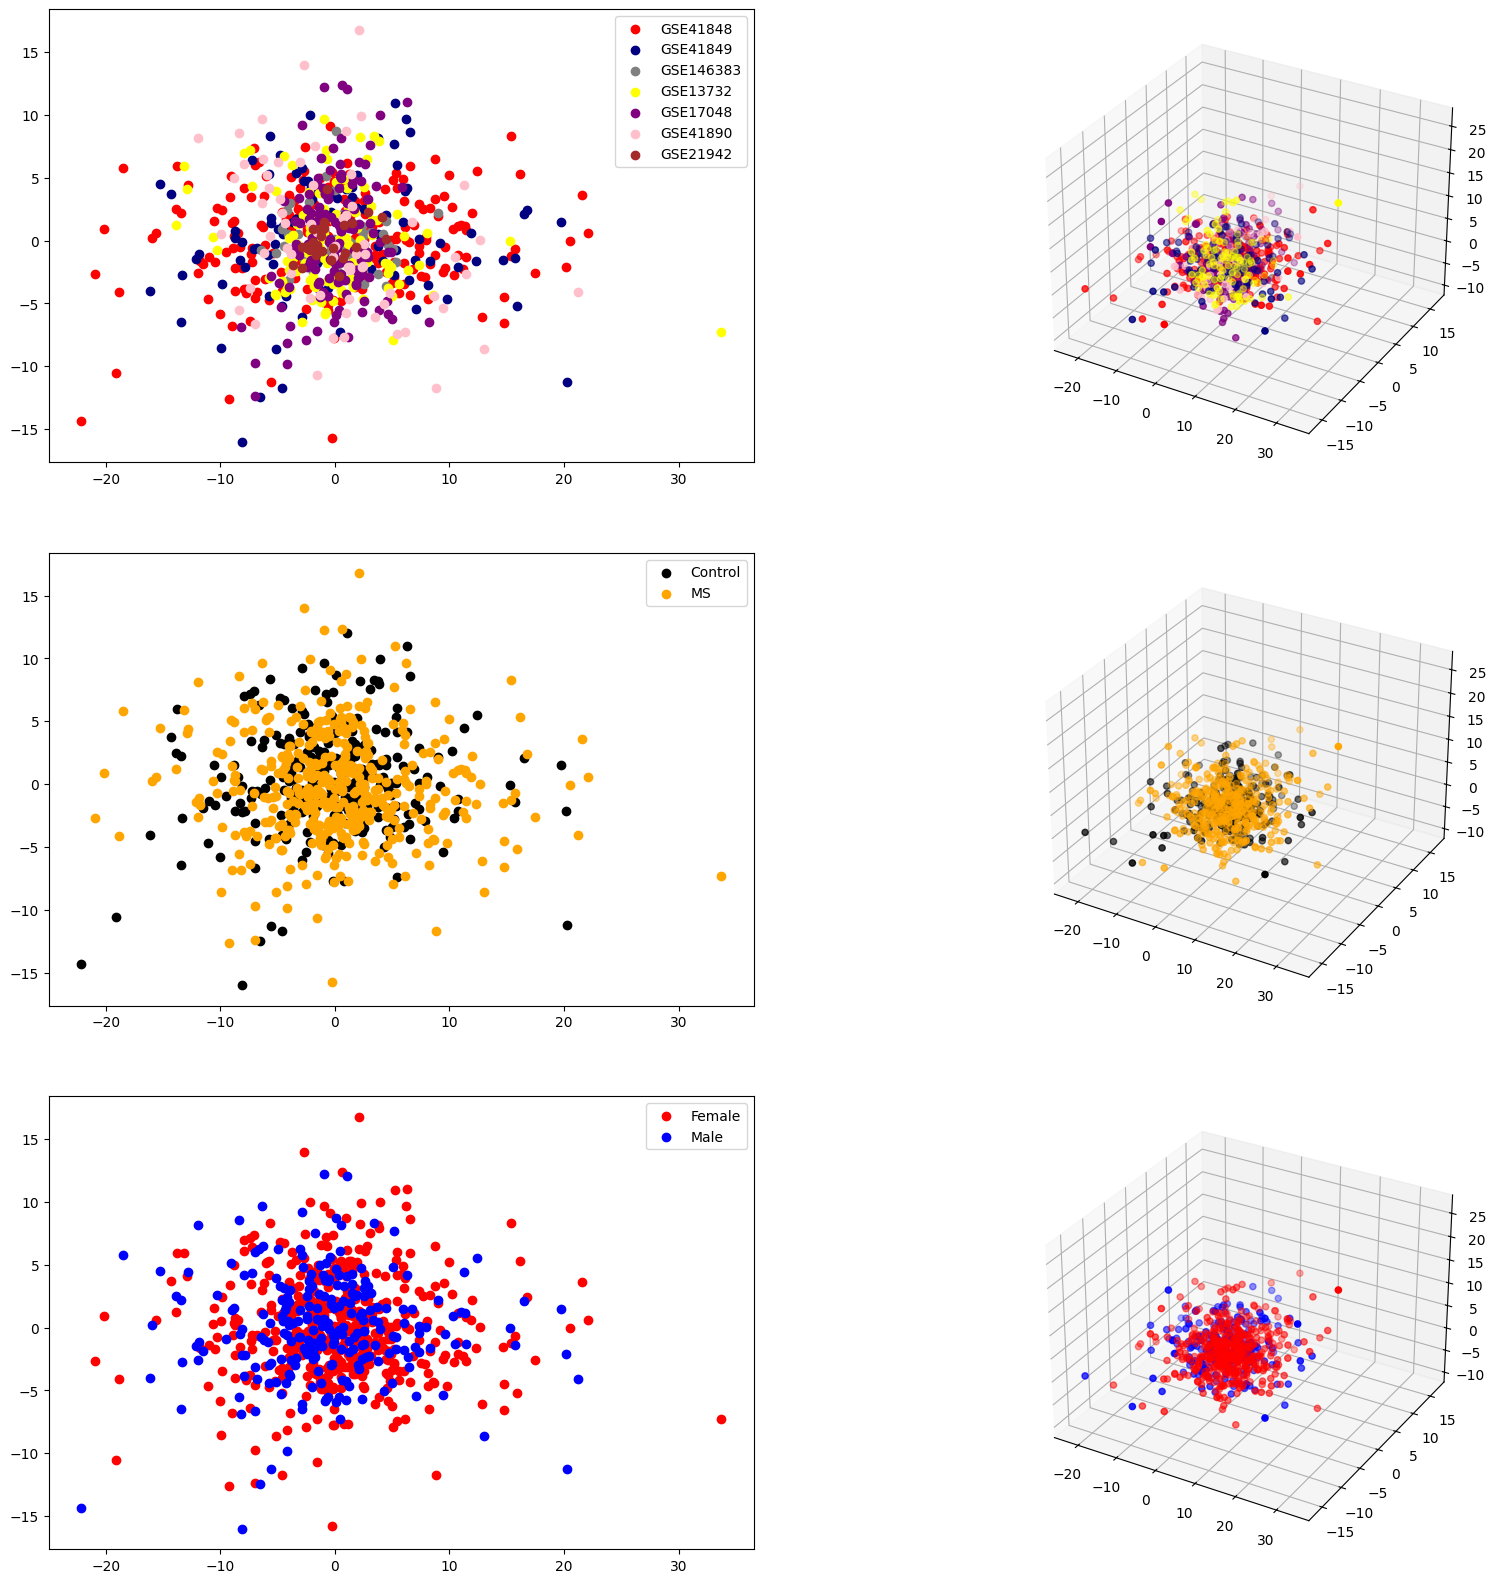

In [15]:
current = dataset.copy()
currentGender = current['Gender']
current.drop(columns=['SampleID', 'Label'], inplace=True)

pca = PCA(n_components=2).fit_transform(current)
pca3 = PCA(n_components=3).fit_transform(current)

fig = plt.figure(figsize=(20, 20))

plot1 = fig.add_subplot(321)
plot2 = fig.add_subplot(322, projection='3d')
plot3 = fig.add_subplot(323)
plot4 = fig.add_subplot(324, projection='3d')
plot5 = fig.add_subplot(325)
plot6 = fig.add_subplot(326, projection='3d')

for i in range(7):
    plot1.scatter(pca[datasetID == str(i)][:, 0], pca[datasetID == str(i)][:, 1], c=color[i], label=classiDataset[i])
    plot2.scatter(pca3[datasetID == str(i)][:, 0], pca3[datasetID == str(i)][:, 1], pca3[datasetID == str(i)][:, 2], c=color[i], label=classiDataset[i])

for i in range(0, 2):
    plot3.scatter(pca[label == i][:, 0], pca[label == i][:, 1], c=colorLabel[i], label=classiLabel[i])
    plot4.scatter(pca3[label == i][:, 0], pca3[label == i][:, 1], pca3[label == i][:, 2], c=colorLabel[i], label=classiLabel[i])

for i in range(0, 2):
    plot5.scatter(pca[currentGender == i][:, 0], pca[currentGender == i][:, 1], c=colorGender[i], label=classiGender[i])
    plot6.scatter(pca3[currentGender == i][:, 0], pca3[currentGender == i][:, 1], pca3[currentGender == i][:, 2], c=colorGender[i], label=classiGender[i])

plot1.legend()
plot3.legend()
plot5.legend()
plt.show()

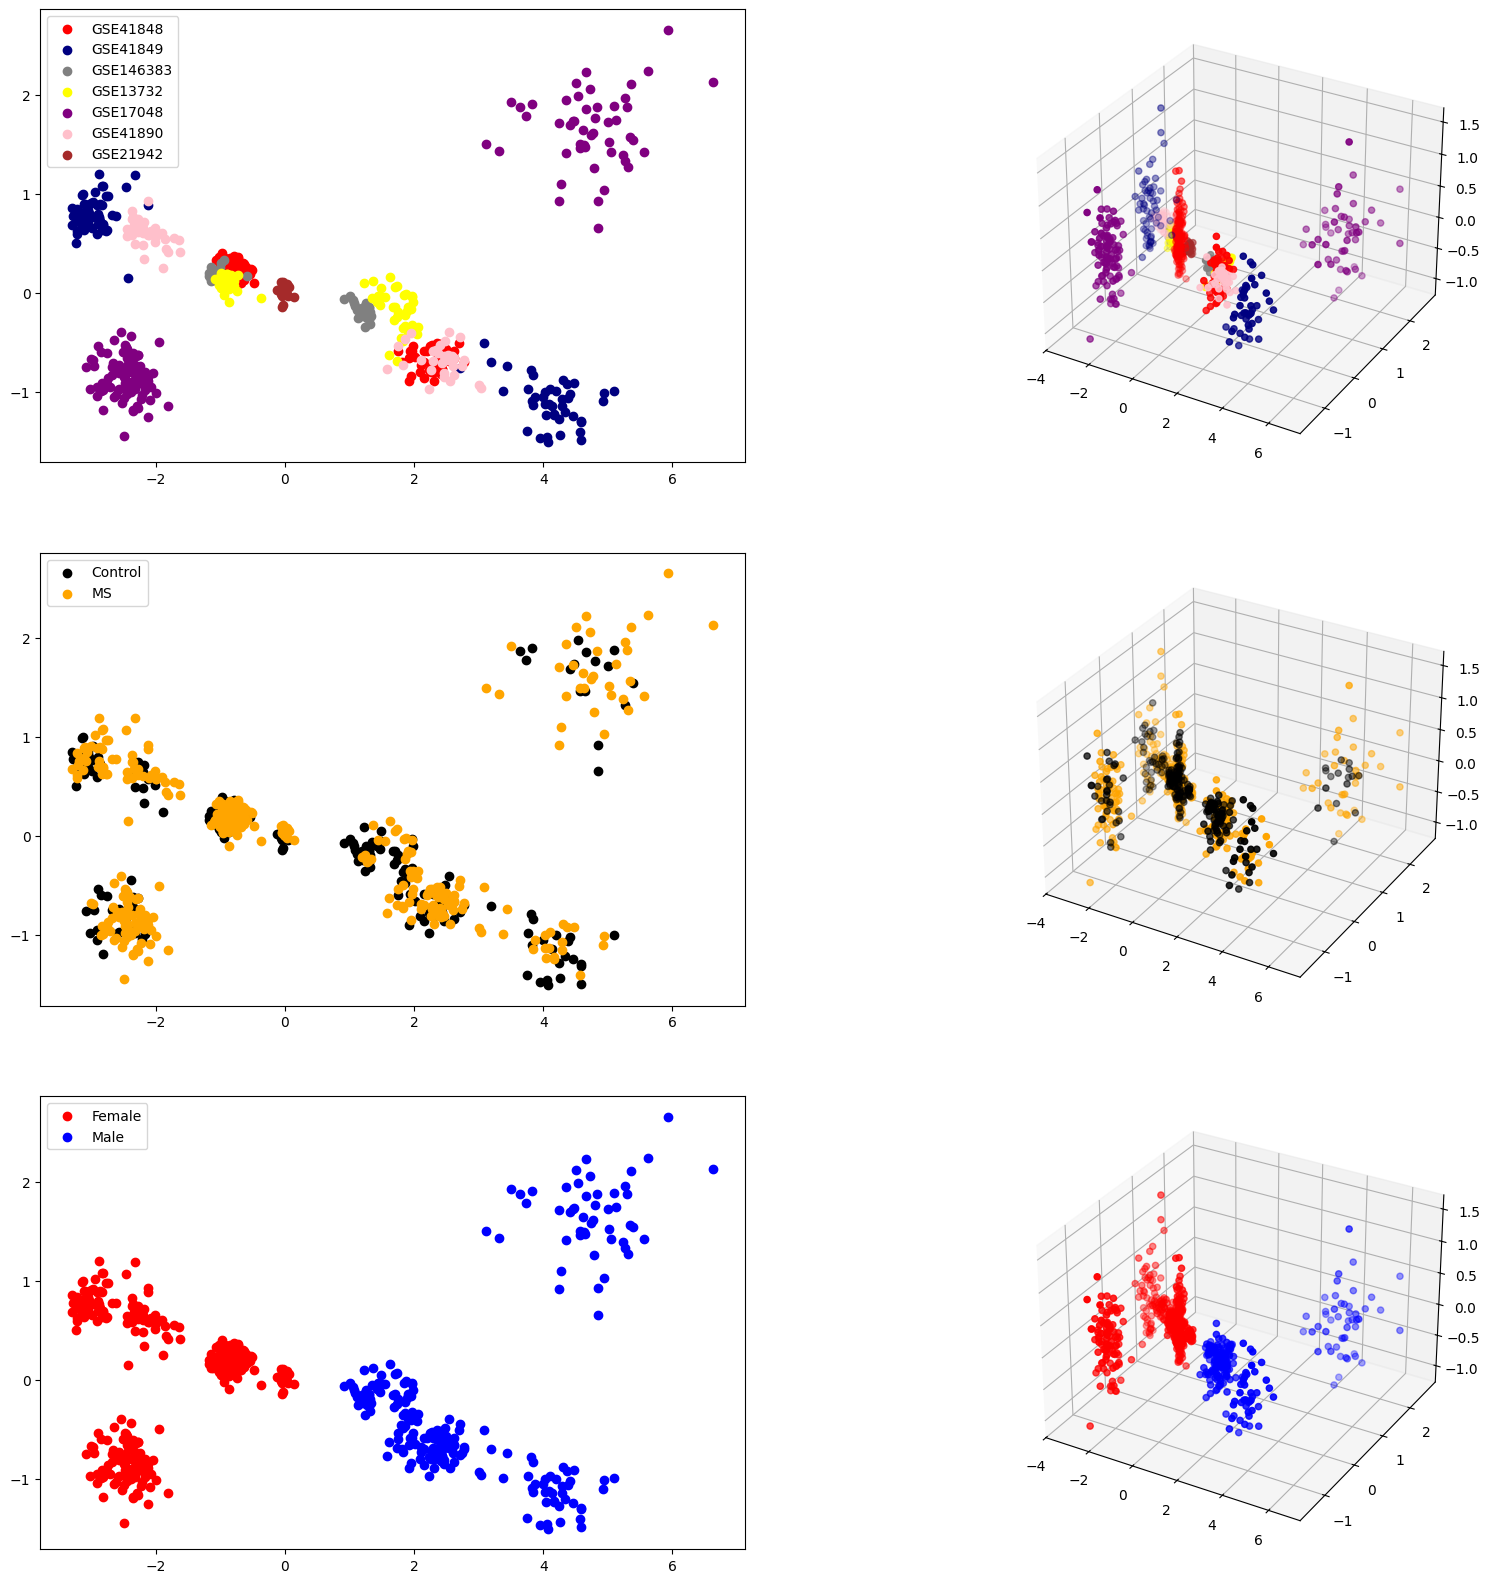

In [16]:
y_linked_genes = pd.read_csv("../../../Dataset/Y_linked_genes.txt", sep=',')

current = dataset.copy()
currentGender = current['Gender']

common_y_genes = list(y_linked_genes[y_linked_genes['HGNC symbol'].isin(current.columns)]['HGNC symbol'])
currentY = current[common_y_genes]

pca = PCA(n_components=2).fit_transform(currentY)
pca3 = PCA(n_components=3).fit_transform(currentY)

fig = plt.figure(figsize=(20, 20))

plot1 = fig.add_subplot(321)
plot2 = fig.add_subplot(322, projection='3d')
plot3 = fig.add_subplot(323)
plot4 = fig.add_subplot(324, projection='3d')
plot5 = fig.add_subplot(325)
plot6 = fig.add_subplot(326, projection='3d')

for i in range(7):
    plot1.scatter(pca[datasetID == str(i)][:, 0], pca[datasetID == str(i)][:, 1], c=color[i], label=classiDataset[i])
    plot2.scatter(pca3[datasetID == str(i)][:, 0], pca3[datasetID == str(i)][:, 1], pca3[datasetID == str(i)][:, 2], c=color[i], label=classiDataset[i])

for i in range(0, 2):
    plot3.scatter(pca[label == i][:, 0], pca[label == i][:, 1], c=colorLabel[i], label=classiLabel[i])
    plot4.scatter(pca3[label == i][:, 0], pca3[label == i][:, 1], pca3[label == i][:, 2], c=colorLabel[i], label=classiLabel[i])

for i in range(0, 2):
    plot5.scatter(pca[currentGender == i][:, 0], pca[currentGender == i][:, 1], c=colorGender[i], label=classiGender[i])
    plot6.scatter(pca3[currentGender == i][:, 0], pca3[currentGender == i][:, 1], pca3[currentGender == i][:, 2], c=colorGender[i], label=classiGender[i])

plot1.legend()
plot3.legend()
plot5.legend()
plt.show()

<h1>Analisi dei geni poorly corrected</h1>

Utils

In [17]:
def computeMixtureScore(datasets, labels, k):
    combinedData = np.vstack(list(datasets))

    with parallel_backend('threading', n_jobs=1):
        knn = NearestNeighbors(n_neighbors=k)
        knn.fit(combinedData)
        _, indices = knn.kneighbors(combinedData)
    
    mixture = 0
    for x in range(0,datasets[0].shape[0]):
        neighbors = indices[x]
        mixture += sum(labels[neighbors] != labels[x])

    mixture_score = mixture / (k * datasets[0].shape[0])
    return mixture_score

def mixtureScore(data, k):
    permutations = list(itertools.combinations(list(set(data['DatasetID'])), 2))

    results = {}

    for perm in permutations:
        data1 = data[data['DatasetID'] == perm[0]]
        data2 = data[data['DatasetID'] == perm[1]]

        dataID = pd.Series.combine_first(data1['DatasetID'], data2['DatasetID']).values

        data1 = data1.drop(columns=['DatasetID', 'SampleID', 'Label', 'Gender'])
        data2 = data2.drop(columns=['DatasetID', 'SampleID', 'Label', 'Gender'])

        if k > data2.shape[0]:
            temp_k = round(data2.shape[0]/2)
            print("K is too large, setting it to ", temp_k)

            results[perm] = computeMixtureScore([data1, data2], dataID, temp_k)
        else:
            results[perm] = computeMixtureScore([data1, data2], dataID, k)

    return results

def diffExpr(data):
    permutations = list(itertools.combinations(list(set(datasetID)), 2))

    result = {}

    for perm in permutations:
        data1 = data[data['DatasetID'] == perm[0]]
        data2 = data[data['DatasetID'] == perm[1]]

        data1.drop(columns=['DatasetID'], inplace=True)
        data2.drop(columns=['DatasetID'], inplace=True)

        genes = tuple(data1.columns)

        statistic, p_value = mannwhitneyu(data1, data2)
        boolean, p_value_corrected = fdrcorrection(p_value, alpha=0.05)

        deGenes = {genes: [statistic, p_value, boolean, p_value_corrected]}
        
        result[perm] = deGenes 
    
    return result

#La funzione restituisce un dizionario con chiavi le coppie di dataset e valori una lista con statistiche, p-value, booleano se il p-value è significativo e p-value corretto 

def biModality(dataset):
    variances = dataset.var(axis=0)
    # p_values = dataset.apply(lambda x: ks_1samp(x, cdf=norm.cdf)[1], axis=0)
    p_values = pd.Series(index=dataset.columns)
    for gene in dataset.columns:
        p_values.loc[gene] = diptest(dataset[gene])[1]

    threshold_var = np.percentile(variances, 50)  # Soglia: top 50% varianza
    list_multiModalGenes = list(dataset.columns[(variances > threshold_var) & (p_values < 0.05)])
    # list_multiModalGenes = list(dataset.columns[(p_values < 0.05)])

    return list_multiModalGenes

def multiModality(dataset):
    optimal_components = {}
    for gene in dataset.columns:
        bic_scores = []
        for n in range(1, 6):
            gmm = GaussianMixture(n_components=n, random_state=0).fit(dataset[gene].values.reshape(-1, 1))
            bic_scores.append(gmm.bic(dataset[gene].values.reshape(-1, 1)))

        optimal_components[gene] = bic_scores.index(min(bic_scores)) + 1
    return optimal_components

In [18]:
dataset = pd.read_csv('MergedDatasetReducedCombat_symbol.csv')
dataset['Gender'] = joblib.load('../Results/DatasetReduced/genderReduced.pkl')
dataset['Gender'] = dataset['Gender'].apply(lambda x: 0 if x == 'female' or x == 'Female' else 1)
datasetID = dataset['SampleID'].apply(lambda x: x.split('-')[0]).values
sampleID = dataset['SampleID']
label = dataset['Label']
gender = dataset['Gender']

<h2>Mixture score</h2>

In [19]:
current = dataset.copy()

current['DatasetID'] = datasetID
currentMS = current[current['Label'] == 1]
currentControl = current[current['Label'] == 0]

scoreMS = mixtureScore(currentMS, 30)
scoreControl = mixtureScore(currentControl, 30)

avgMS_score = np.mean(list(scoreMS.values()))
avgControl_score = np.mean(list(scoreControl.values()))

print("MS Mixture Score: ", avgMS_score)
print("Control Mixture Score: ", avgControl_score)

K is too large, setting it to  8
K is too large, setting it to  7
K is too large, setting it to  8
K is too large, setting it to  7
K is too large, setting it to  7
K is too large, setting it to  8
K is too large, setting it to  8
K is too large, setting it to  8
MS Mixture Score:  0.26431574603209046
Control Mixture Score:  0.30634988276992037


<h2>Geni differenzialmente espressi tra dataset</h2>

DE tra dataset sui sani

In [22]:
warnings.filterwarnings("ignore")
current = dataset.copy()
current.drop(columns=['SampleID', 'Label'], inplace=True)
current['DatasetID'] = datasetID
currentControl = current[label == 0]

results = diffExpr(currentControl)

deGenes = set()

first = True

for key, value in results.items():
    genes = list(list(value.keys())[0])
    singleResult = list(value.values())
    resultDf = pd.DataFrame({'statistic': singleResult[0][0], 'p-value': singleResult[0][1], 'significant': singleResult[0][2], 'p-value corrected': singleResult[0][3]})
    resultDf.index = genes

    resultDf['significant'] = resultDf['p-value'] < 0.05

    currentDeGenesControl = set(resultDf[resultDf['significant']].index)

    if first == True:
        deGenesControl = currentDeGenesControl
        first = False
    else: deGenesControl = deGenesControl.intersection(currentDeGenesControl)

print(len(deGenesControl), deGenesControl)

0 set()


DE tra dataset sui malati

In [23]:
warnings.filterwarnings("ignore")

current = dataset.copy()
current.drop(columns=['SampleID', 'Label'], inplace=True)
current['DatasetID'] = datasetID
currentMS = current[label == 1]

results = diffExpr(currentMS)

deGenes = set()

first = True

for key, value in results.items():
    genes = list(list(value.keys())[0])
    singleResult = list(value.values())
    resultDf = pd.DataFrame({'statistic': singleResult[0][0], 'p-value': singleResult[0][1], 'significant': singleResult[0][2], 'p-value corrected': singleResult[0][3]})
    resultDf.index = genes

    resultDf['significant'] = resultDf['p-value'] < 0.05

    currentDeGenesMs = set(resultDf[resultDf['significant']].index)

    if first == True:
        deGenesMs = currentDeGenesMs
        first = False
    else: deGenesMs = deGenesMs.intersection(currentDeGenesMs)

print(len(deGenesMs), deGenesMs)

1 {'KRT10'}


Geni DE tra dataset comuni ai due gruppi

In [24]:
commonDeGenes = deGenesControl.intersection(deGenesMs)
print(len(commonDeGenes), commonDeGenes)

0 set()


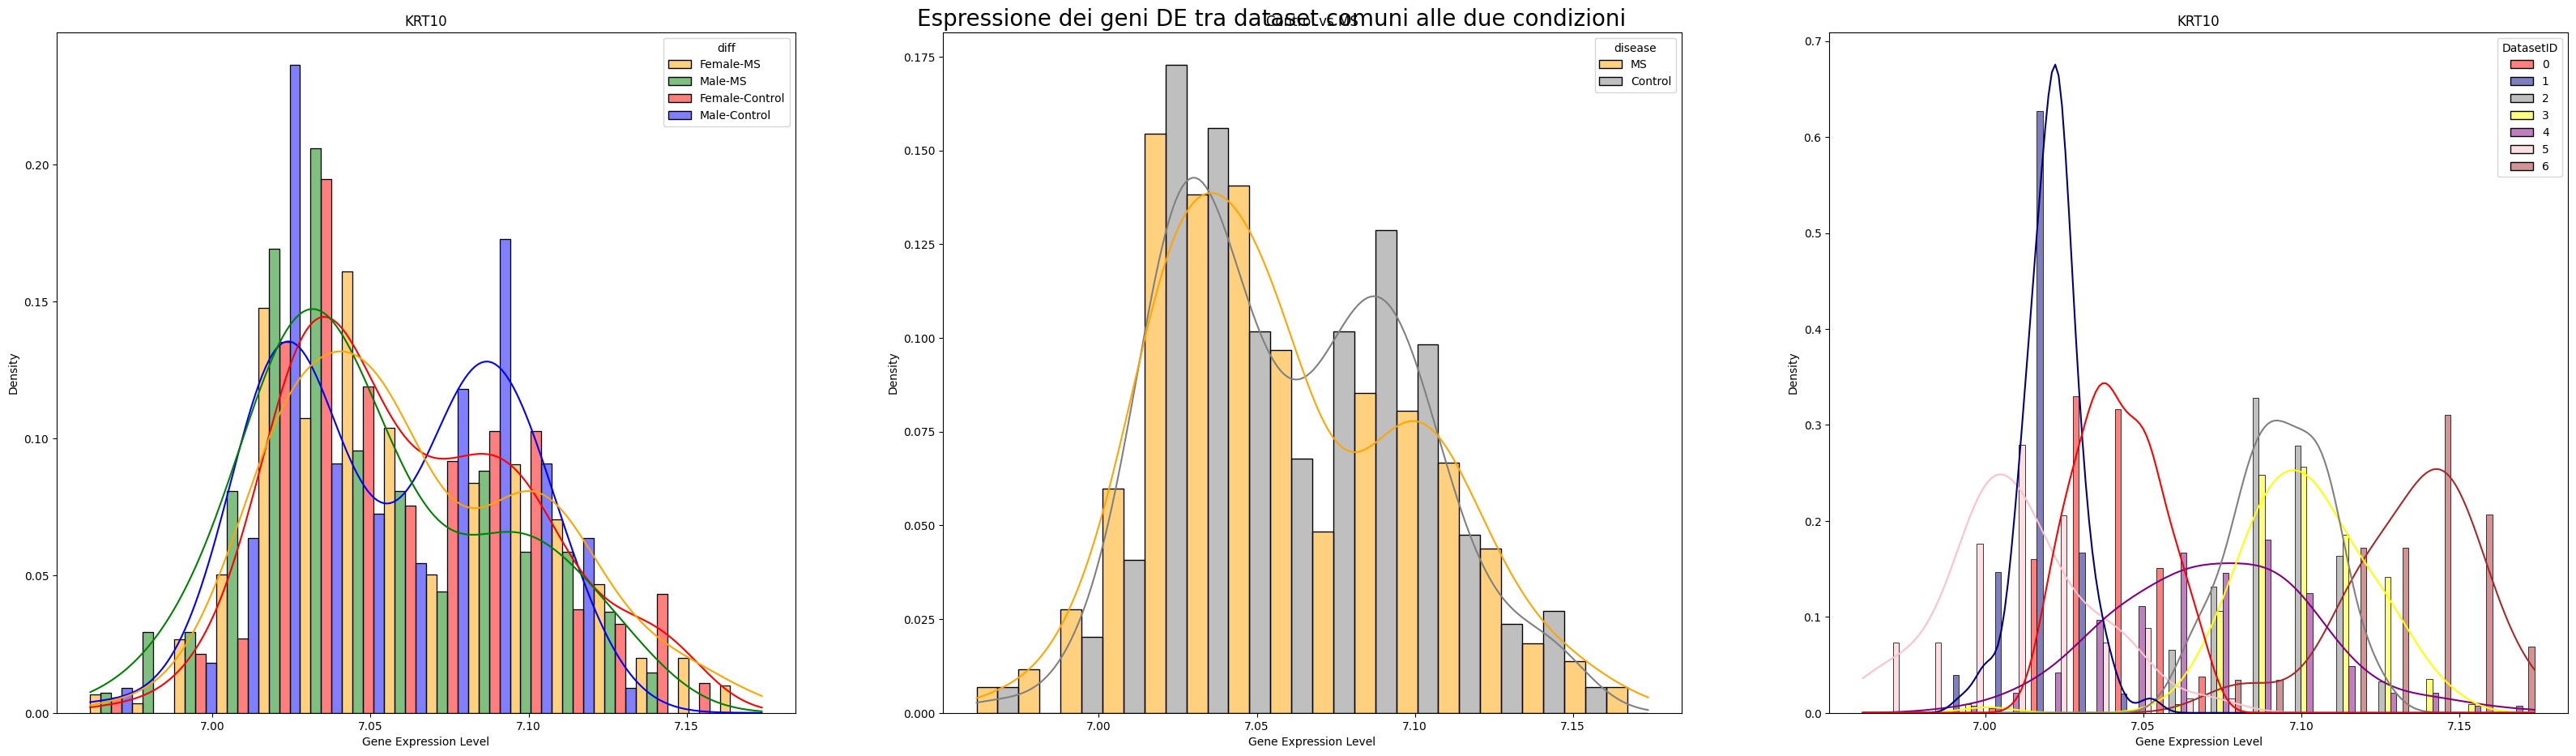

In [32]:
current = dataset.copy()

current['Gender'] = current['Gender'].apply(lambda x: 'Male' if x == 1 else 'Female')
current['disease'] = current['Label'].apply(lambda x: 'MS' if x == 1 else 'Control')
current['diff'] = current['Gender']+"-"+current['disease'].astype(str)
current['DatasetID'] = datasetID

gene_list = list(deGenesMs)

fig, axes = plt.subplots(len(gene_list), 3, figsize=(40, 10))
axes = np.array([axes])

for i, gene in enumerate(gene_list):
    sns.histplot(data=current, x=gene, hue='diff', stat="probability",
                 kde=True, palette={'Female-MS':'orange', 'Female-Control':'red', 'Male-MS':'green', 'Male-Control':'blue'}, multiple='dodge', common_norm=False, ax=axes[i][0])
    axes[i][0].set_title(gene)
    axes[i][0].set_xlabel("Gene Expression Level")
    axes[i][0].set_ylabel("Density")


    sns.histplot(data=current, x=gene, hue='disease', stat="probability",
                 kde=True, palette={'Control': 'grey', 'MS': 'orange'}, multiple='dodge', common_norm=False, ax=axes[i][1])
    axes[i][1].set_title('Control vs MS')
    axes[i][1].set_xlabel("Gene Expression Level")
    axes[i][1].set_ylabel("Density")

    sns.histplot(data=current, x=gene, hue='DatasetID', stat="probability",
                 kde=True, palette={'0':'red', '1':'navy', '2':'grey', '3':'yellow', '4':'purple', '5':'pink', '6':'brown'}, multiple='dodge', common_norm=False, ax=axes[i][2])
    axes[i][2].set_title(gene)
    axes[i][2].set_xlabel("Gene Expression Level")
    axes[i][2].set_ylabel("Density")

    plt.subplots_adjust(hspace=0.5)

plt.suptitle("Espressione dei geni DE tra dataset comuni alle due condizioni", fontsize=20)
plt.subplots_adjust(top=0.95)
plt.show()

<h2>MultiModalità</h2>

I test di multimodalità vengono eseguiti per ogni gene sui sample appartenenti agli stessi gruppi biologici in modo da evitare che la condizione non influenzi il rilevamento di batch effect residui

In [35]:
current = dataset.copy()
current.drop(columns=['SampleID', 'Label', 'Gender'], inplace=True)
currentMS = current[label == 1]
currentControl = current[label == 0]

bimodalMS = biModality(currentMS)
bimodalControl = biModality(currentControl)

In [36]:
commonBimodal = set(bimodalMS).union(set(bimodalControl))
print(len(commonBimodal), commonBimodal)

12 {'SULT1C4', 'HLA-DRB5', 'UTY', 'NPM1', 'RPS4Y1', 'DDX3Y', 'HNRNPA1', 'EIF1AY', 'RPL24', 'HLA-DRB1', 'TXLNGY', 'PRKY'}


Plot solo sui sample di cui conosco esattamente il genere

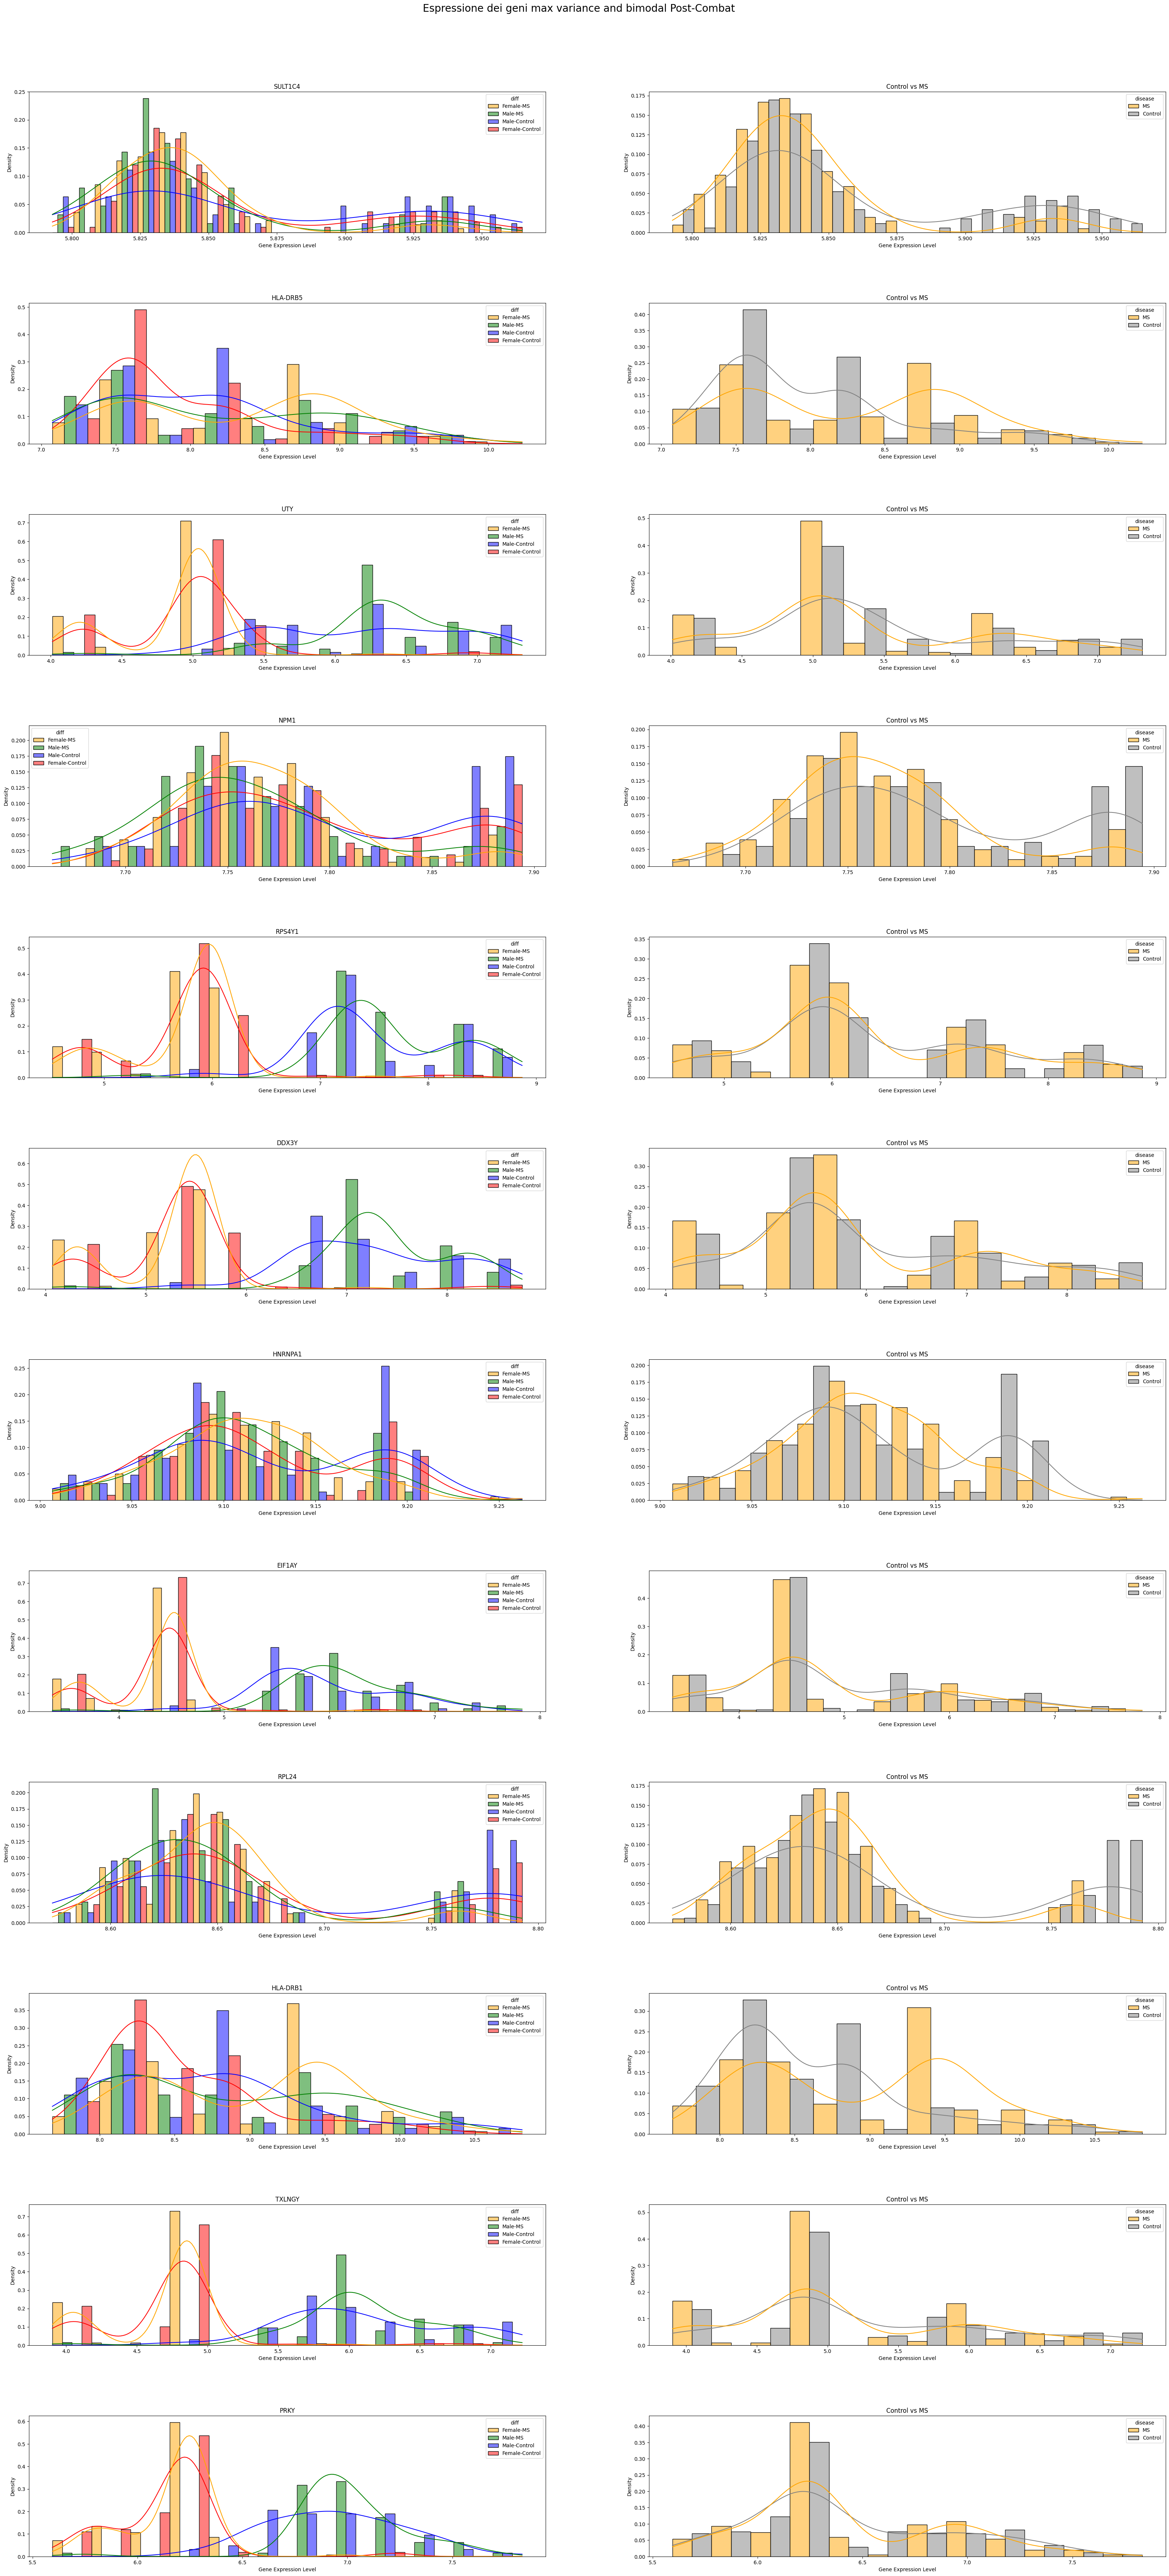

In [ ]:
current = datasetGenderExact.copy()
current['Gender'] = current['Gender'].apply(lambda x: 0 if x == 'female' or x == 'Female' else 1)
current['Gender'] = current['Gender'].apply(lambda x: 'Male' if x == 1 else 'Female')
current['disease'] = current['Label'].apply(lambda x: 'MS' if x == 1 else 'Control')
current['diff'] = current['Gender']+"-"+current['disease'].astype(str)
current['DatasetID'] = current['SampleID'].apply(lambda x: x.split('-')[0])

gene_list = list(commonBimodal)

fig, axes = plt.subplots(len(gene_list), 2, figsize=(40, 80))

for i, gene in enumerate(gene_list):
    sns.histplot(data=current, x=gene, hue='diff', stat="probability",
                 kde=True, palette={'Female-MS':'orange', 'Female-Control':'red', 'Male-MS':'green', 'Male-Control':'blue'}, multiple='dodge', common_norm=False, ax=axes[i][0])
    axes[i][0].set_title(gene)
    axes[i][0].set_xlabel("Gene Expression Level")
    axes[i][0].set_ylabel("Density")


    sns.histplot(data=current, x=gene, hue='disease', stat="probability",
                 kde=True, palette={'Control': 'grey', 'MS': 'orange'}, multiple='dodge', common_norm=False, ax=axes[i][1])
    axes[i][1].set_title('Control vs MS')
    axes[i][1].set_xlabel("Gene Expression Level")
    axes[i][1].set_ylabel("Density")

    plt.subplots_adjust(hspace=0.5)

plt.suptitle("Espressione dei geni bimodali Post-Combat", fontsize=20)
plt.subplots_adjust(top=0.95)
plt.show()

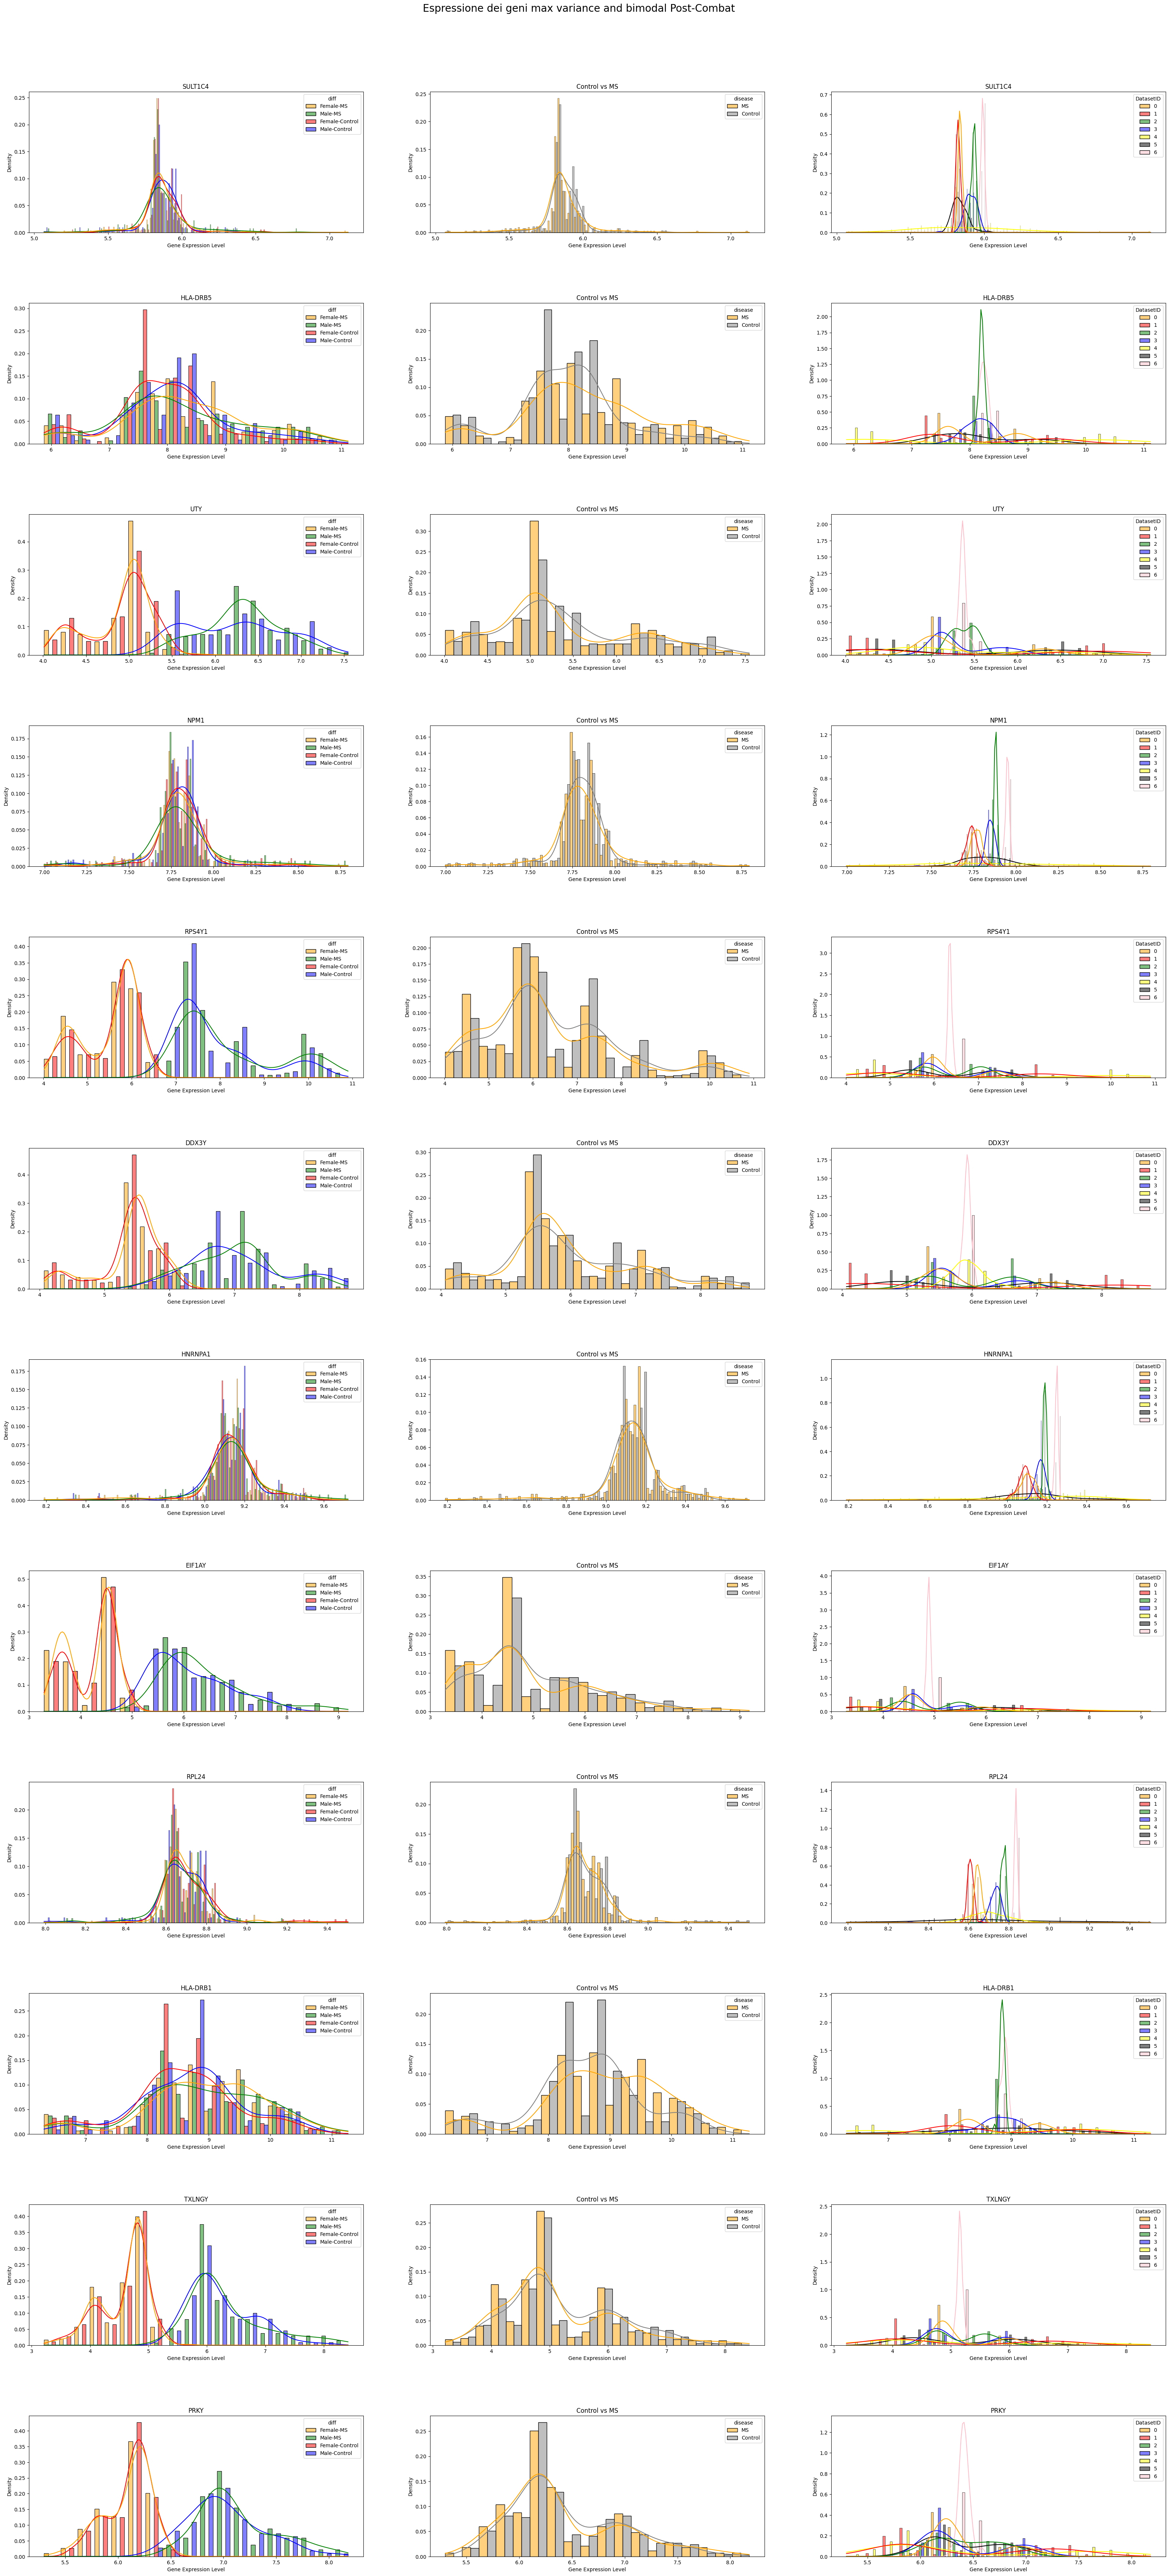

In [38]:
current = dataset.copy()
current['Gender'] = current['Gender'].apply(lambda x: 'Male' if x == 1 else 'Female')
current['disease'] = current['Label'].apply(lambda x: 'MS' if x == 1 else 'Control')
current['diff'] = current['Gender']+"-"+current['disease'].astype(str)
current['DatasetID'] = current['SampleID'].apply(lambda x: x.split('-')[0])

gene_list = list(commonBimodal)

fig, axes = plt.subplots(len(gene_list), 3, figsize=(40, 80))

for i, gene in enumerate(gene_list):
    sns.histplot(data=current, x=gene, hue='diff', stat="probability",
                 kde=True, palette={'Female-MS':'orange', 'Female-Control':'red', 'Male-MS':'green', 'Male-Control':'blue'}, multiple='dodge', common_norm=False, ax=axes[i][0])
    axes[i][0].set_title(gene)
    axes[i][0].set_xlabel("Gene Expression Level")
    axes[i][0].set_ylabel("Density")


    sns.histplot(data=current, x=gene, hue='disease', stat="probability",
                 kde=True, palette={'Control': 'grey', 'MS': 'orange'}, multiple='dodge', common_norm=False, ax=axes[i][1])
    axes[i][1].set_title('Control vs MS')
    axes[i][1].set_xlabel("Gene Expression Level")
    axes[i][1].set_ylabel("Density")

    sns.histplot(data=current, x=gene, hue='DatasetID', stat="probability",
                 kde=True, palette={'0':'orange', '1':'red', '2':'green', '3':'blue', '4':'yellow', '5':'black', '6':'pink', '7':'brown'}, multiple='dodge', common_norm=False, ax=axes[i][2])
    axes[i][2].set_title(gene)
    axes[i][2].set_xlabel("Gene Expression Level")
    axes[i][2].set_ylabel("Density")

    plt.subplots_adjust(hspace=0.5)

plt.suptitle("Espressione dei geni max variance and bimodal Post-Combat", fontsize=20)
plt.subplots_adjust(top=0.95)
plt.show()

<h1>Analisi espressione differenziale</h1>

In [40]:
current = dataset.copy()

warnings.filterwarnings("ignore")

currentControl = current.loc[current['Label'] == 0, :]
currentMS = current.loc[current['Label'] == 1, :]

currentControl.drop(columns=['SampleID', 'Label', 'Gender'], inplace=True)
currentMS.drop(columns=['SampleID', 'Label', 'Gender'], inplace=True)

p_values = [mannwhitneyu(currentControl[gene], currentMS[gene])[1] for gene in currentControl.columns]
boolean, p_values_corrected = fdrcorrection(p_values, alpha=0.05)
deGenes = [gene for gene, sig in zip(currentControl.columns, boolean) if sig]

print(len(deGenes), deGenes)

1496 ['MAPK1IP1L', 'CMKLR1', 'C14orf93', 'ANAPC15', 'PCBD1', 'RASSF7', 'UBXN7', 'GYPA', 'PTPN22', 'TNS1', 'SLC22A17', 'ZNF324B', 'ZNF721', 'TRIOBP', 'GSK3B', 'CTDSPL', 'CELSR1', 'ELOA', 'HUWE1', 'TNKS', 'CNBP', 'RNF122', 'TRIM3', 'PIK3R5', 'PRG4', 'IFIT5', 'DUX4', 'RLF', 'CYBRD1', 'PSME4', 'SOD1', 'RXYLT1', 'TNS3', 'RIPOR1', 'COQ3', 'USP7', 'SKIL', 'SETBP1', 'CDC25C', 'DIAPH1', 'RAE1', 'EPB41L4A', 'GPATCH8', 'PREB', 'KRAS', 'PRRC2A', 'CABYR', 'INTS9', 'LCP1', 'POLR2K', 'ZNF574', 'ADGRG1', 'TUBB4B', 'DIP2C', 'SLC25A37', 'STIP1', 'PPCS', 'SAFB2', 'PWWP3A', 'SEMA4D', 'CCNH', 'FEZ1', 'NPFF', 'PRPF40A', 'SPARC', 'REL', 'CEBPA', 'ENTR1', 'ATF7IP', 'ETV3', 'ELAC1', 'RBMS2', 'TTLL4', 'LYN', 'PGM1', 'DBI', 'MS4A1', 'HMOX1', 'B3GALNT1', 'LUZP1', 'DPEP2', 'ZNF500', 'BTF3', 'HP1BP3', 'PRDM8', 'PKD2L2', 'HDLBP', 'DEFA4', 'ARFGEF2', 'SLC17A5', 'CBX3', 'CDH2', 'MANF', 'SIRPA', 'PRUNE1', 'ATG13', 'NDUFA8', 'YEATS4', 'RPS20', 'MBP', 'CCNA1', 'KCTD13', 'PLXDC2', 'CXCL2', 'TOR1A', 'MCUB', 'RBX1', 'ENO3',